# Network centrality from OSM data

Calculate metric distance centralities for OSM data.


In [1]:
import matplotlib.pyplot as plt
from cityseer.metrics import networks
from cityseer.tools import graphs, io


Prepare the network as shown in OSM examples. For example, from a relation id, bounding box, buffered point, or for extents defined from a loaded file. This example uses a buffered point.

Using a simplified representation is recommended, otherwise centrality measures will be distorted for "messier" portions of the network.


In [2]:
lng, lat = -0.13396079424572427, 51.51371088849723
buffer = 1500
poly_wgs, epsg_code = io.buffered_point_poly(lng, lat, buffer)
G = io.osm_graph_from_poly(poly_wgs)
G_dual = graphs.nx_to_dual(G)

INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.io:Converting networkX graph to CRS code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating 

Use [`network_structure_from_nx`](https://cityseer.benchmarkurbanism.com/tools/io#network-structure-from-nx) from the `cityseer` package's `io` module to prepare the `GeoDataFrames` and `NetworkStructure`.


In [ ]:
# prepare the data structures
nodes_gdf, _edges_gdf, network_structure = io.network_structure_from_nx(
    G_dual,
)

INFO:cityseer.tools.io:Preparing node and edge arrays from networkX graph.


Use the [`node_centrality_shortest`](https://cityseer.benchmarkurbanism.com/metrics/networks#node-centrality-shortest) function from the `cityseer` package's `networks` module to calculate shortest metric distance centralities.

> Use angular centralities with caution on automatically cleaned OSM networks, preferably only after visual inspection and manual cleaning.


In [4]:
distances = [500, 1000]
nodes_gdf = networks.node_centrality_shortest(
    network_structure=network_structure,
    nodes_gdf=nodes_gdf,
    distances=distances,
)
nodes_gdf.head()

INFO:cityseer.metrics.networks:Computing shortest path node centrality.
INFO:cityseer.config:Metrics computed for:
INFO:cityseer.config:Distance: 500m, Beta: 0.008, Walking Time: 6.25 minutes.
INFO:cityseer.config:Distance: 1000m, Beta: 0.004, Walking Time: 12.5 minutes.


,ns_node_idx,x,y,live,weight,primal_edge,primal_edge_node_a,primal_edge_node_b,primal_edge_idx,dual_node,...,cc_farness_500,cc_farness_1000,cc_harmonic_500,cc_harmonic_1000,cc_hillier_500,cc_hillier_1000,cc_betweenness_500,cc_betweenness_1000,cc_betweenness_beta_500,cc_betweenness_beta_1000
108285_108286_k0,0,698450.171116,5.709385e+06,True,1,"LINESTRING (698442.587 5709352.756, 698455.797...",108285,108286,0,POINT (698450.171116 5709384.525724),...,5918.053223,57333.406250,0.204284,0.281617,0.142108,0.144436,0.0,0.0,0.000000,0.000000
108286_6226833739_k0,1,698445.518357,5.709425e+06,True,1,"LINESTRING (698434.184 5709439.895, 698435.241...",108286,6226833739,0,POINT (698445.518357 5709425.066711),...,5108.617676,59628.519531,0.270784,0.353576,0.164624,0.151354,10.0,10.0,2.237725,4.535670
108286_1270370717±1784656260_k0,2,698462.969675,5.709425e+06,True,1,"LINESTRING (698465.562 5709434.93, 698460.378 ...",108286,1270370717±1784656260,0,POINT (698462.969675 5709425.051823),...,5866.822266,66397.101562,0.310603,0.401597,0.163802,0.162899,32.0,160.0,8.084851,20.537325
1936005006_610896454±61089|05006_k0,3,698508.474675,5.709425e+06,True,1,"LINESTRING (698494.235 5709445.995, 698518.821...",1936005006,610896454±61089|05006,0,POINT (698508.474675 5709425.429823),...,6557.025391,66485.359375,0.213854,0.303207,0.146560,0.159569,0.0,0.0,0.000000,0.000000
1784656176_6226833739_k0,4,698421.101261,5.709460e+06,True,1,"LINESTRING (698434.184 5709439.895, 698432.763...",6226833739,1784656176,0,POINT (698421.101261 5709459.670573),...,5746.660645,61360.828125,0.265466,0.348724,0.167228,0.156517,63.0,63.0,14.596126,29.232420


In [5]:
nodes_gdf.columns

Index(['ns_node_idx', 'x', 'y', 'live', 'weight', 'primal_edge',
       'primal_edge_node_a', 'primal_edge_node_b', 'primal_edge_idx',
       'dual_node', 'cc_beta_500', 'cc_beta_1000', 'cc_cycles_500',
       'cc_cycles_1000', 'cc_density_500', 'cc_density_1000', 'cc_farness_500',
       'cc_farness_1000', 'cc_harmonic_500', 'cc_harmonic_1000',
       'cc_hillier_500', 'cc_hillier_1000', 'cc_betweenness_500',
       'cc_betweenness_1000', 'cc_betweenness_beta_500',
       'cc_betweenness_beta_1000'],
      dtype='object')

In [6]:
nodes_gdf["cc_hillier_500"].describe()

count    2825.000000
mean        0.560724
std         0.208340
min         0.028747
25%         0.421762
50%         0.549569
75%         0.695934
max         1.059475
Name: cc_hillier_500, dtype: float64

(np.float64(697035.8123208123),
 np.float64(700647.6928482385),
 np.float64(5709134.052621752),
 np.float64(5712638.694212982))

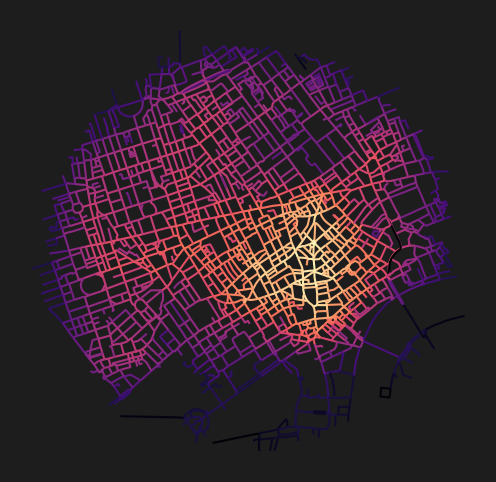

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor="#1d1d1d")
nodes_gdf.plot(
    column="cc_hillier_500",
    cmap="magma",
    legend=False,
    ax=ax,
)
ax.axis(False)

(np.float64(697035.8123208123),
 np.float64(700647.6928482385),
 np.float64(5709134.052621752),
 np.float64(5712638.694212982))

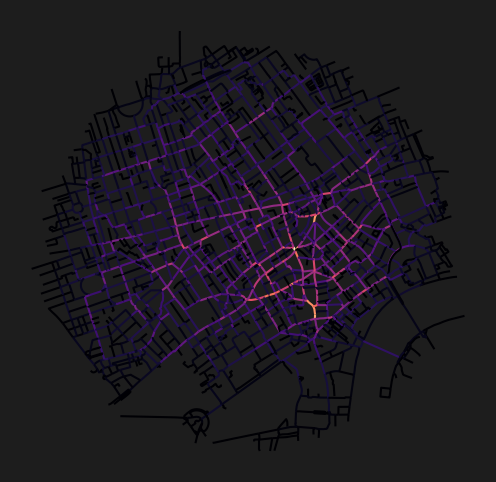

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6), facecolor="#1d1d1d")
nodes_gdf.plot(
    column="cc_betweenness_1000",
    cmap="magma",
    legend=False,
    ax=ax,
)
ax.axis(False)